In [1]:
%matplotlib inline

In [2]:
%run notebook_setup

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


theano version: 1.0.4


pymc3 version: 3.7


exoplanet version: 0.1.7.dev0


In [3]:
ndim = 15

In [4]:
import time

import emcee
import numpy as np

import pymc3 as pm
from pymc3.step_methods.hmc import quadpotential as quad

In [5]:
np.random.seed(41)

with pm.Model() as model:
    pm.Normal("x", shape=ndim)
    
    potential = quad.QuadPotentialDiag(np.ones(ndim))
    
    step_kwargs = dict()
    step_kwargs["model"] = model
    step_kwargs["step_scale"] = 1.0 * model.ndim ** 0.25
    step_kwargs["adapt_step_size"] = False
    step = pm.NUTS(potential=potential, **step_kwargs)

    start = time.time()
    trace = pm.sample(tune=0, draws=10000, step=step, cores=1)
    time_pymc3 = time.time() - start

Sequential sampling (2 chains in 1 job)


NUTS: [x]


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 1/10000 [00:00<1:02:42,  2.66it/s]

  2%|▏         | 158/10000 [00:00<43:14,  3.79it/s]

  3%|▎         | 318/10000 [00:00<29:48,  5.41it/s]

  5%|▍         | 479/10000 [00:00<20:32,  7.72it/s]

  6%|▋         | 641/10000 [00:00<14:09, 11.01it/s]

  8%|▊         | 805/10000 [00:00<09:46, 15.69it/s]

  9%|▉         | 940/10000 [00:00<06:46, 22.30it/s]

 11%|█         | 1101/10000 [00:01<04:41, 31.66it/s]

 13%|█▎        | 1260/10000 [00:01<03:14, 44.85it/s]

 14%|█▍        | 1423/10000 [00:01<02:15, 63.32it/s]

 16%|█▌        | 1586/10000 [00:01<01:34, 88.97it/s]

 18%|█▊        | 1750/10000 [00:01<01:06, 124.20it/s]

 19%|█▉        | 1914/10000 [00:01<00:47, 171.81it/s]

 21%|██        | 2073/10000 [00:01<00:33, 233.88it/s]

 22%|██▏       | 2242/10000 [00:01<00:24, 315.34it/s]

 24%|██▍       | 2407/10000 [00:01<00:18, 416.12it/s]

 26%|██▌       | 2569/10000 [00:01<00:13, 535.14it/s]

 27%|██▋       | 2733/10000 [00:02<00:10, 670.21it/s]

 29%|██▉       | 2895/10000 [00:02<00:08, 812.32it/s]

 31%|███       | 3058/10000 [00:02<00:07, 955.13it/s]

 32%|███▏      | 3222/10000 [00:02<00:06, 1091.24it/s]

 34%|███▍      | 3385/10000 [00:02<00:05, 1209.41it/s]

 35%|███▌      | 3548/10000 [00:02<00:04, 1307.37it/s]

 37%|███▋      | 3710/10000 [00:02<00:04, 1381.90it/s]

 39%|███▊      | 3872/10000 [00:02<00:04, 1441.36it/s]

 40%|████      | 4033/10000 [00:02<00:04, 1463.18it/s]

 42%|████▏     | 4192/10000 [00:03<00:03, 1498.22it/s]

 44%|████▎     | 4351/10000 [00:03<00:03, 1519.13it/s]

 45%|████▌     | 4510/10000 [00:03<00:03, 1535.06it/s]

 47%|████▋     | 4672/10000 [00:03<00:03, 1556.77it/s]

 48%|████▊     | 4834/10000 [00:03<00:03, 1573.21it/s]

 50%|████▉     | 4996/10000 [00:03<00:03, 1586.12it/s]

 52%|█████▏    | 5158/10000 [00:03<00:03, 1595.36it/s]

 53%|█████▎    | 5319/10000 [00:03<00:02, 1597.86it/s]

 55%|█████▍    | 5480/10000 [00:03<00:02, 1597.86it/s]

 56%|█████▋    | 5645/10000 [00:03<00:02, 1612.05it/s]

 58%|█████▊    | 5811/10000 [00:04<00:02, 1624.91it/s]

 60%|█████▉    | 5977/10000 [00:04<00:02, 1634.79it/s]

 61%|██████▏   | 6141/10000 [00:04<00:02, 1613.86it/s]

 63%|██████▎   | 6303/10000 [00:04<00:02, 1599.43it/s]

 65%|██████▍   | 6467/10000 [00:04<00:02, 1609.71it/s]

 66%|██████▋   | 6631/10000 [00:04<00:02, 1616.39it/s]

 68%|██████▊   | 6795/10000 [00:04<00:01, 1620.51it/s]

 70%|██████▉   | 6958/10000 [00:04<00:01, 1617.69it/s]

 71%|███████   | 7120/10000 [00:04<00:01, 1615.61it/s]

 73%|███████▎  | 7283/10000 [00:04<00:01, 1616.91it/s]

 74%|███████▍  | 7447/10000 [00:05<00:01, 1621.38it/s]

 76%|███████▌  | 7610/10000 [00:05<00:01, 1621.50it/s]

 78%|███████▊  | 7773/10000 [00:05<00:01, 1615.54it/s]

 79%|███████▉  | 7935/10000 [00:05<00:01, 1613.23it/s]

 81%|████████  | 8097/10000 [00:05<00:01, 1604.72it/s]

 83%|████████▎ | 8260/10000 [00:05<00:01, 1609.57it/s]

 84%|████████▍ | 8422/10000 [00:05<00:00, 1611.44it/s]

 86%|████████▌ | 8584/10000 [00:05<00:00, 1603.93it/s]

 87%|████████▋ | 8747/10000 [00:05<00:00, 1611.61it/s]

 89%|████████▉ | 8909/10000 [00:05<00:00, 1593.59it/s]

 91%|█████████ | 9069/10000 [00:06<00:00, 1565.49it/s]

 92%|█████████▏| 9231/10000 [00:06<00:00, 1579.63it/s]

 94%|█████████▍| 9393/10000 [00:06<00:00, 1590.10it/s]

 96%|█████████▌| 9553/10000 [00:06<00:00, 1577.52it/s]

 97%|█████████▋| 9715/10000 [00:06<00:00, 1587.87it/s]

 99%|█████████▊| 9874/10000 [00:06<00:00, 1575.35it/s]

100%|██████████| 10000/10000 [00:06<00:00, 1508.39it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]

  1%|▏         | 147/10000 [00:00<00:06, 1463.68it/s]

  3%|▎         | 310/10000 [00:00<00:06, 1509.40it/s]

  5%|▍         | 476/10000 [00:00<00:06, 1549.61it/s]

  6%|▋         | 640/10000 [00:00<00:05, 1575.04it/s]

  8%|▊         | 803/10000 [00:00<00:05, 1590.03it/s]

 10%|▉         | 964/10000 [00:00<00:05, 1595.01it/s]

 11%|█         | 1124/10000 [00:00<00:05, 1596.24it/s]

 13%|█▎        | 1287/10000 [00:00<00:05, 1604.08it/s]

 15%|█▍        | 1452/10000 [00:00<00:05, 1617.03it/s]

 16%|█▌        | 1615/10000 [00:01<00:05, 1620.46it/s]

 18%|█▊        | 1773/10000 [00:01<00:05, 1601.50it/s]

 19%|█▉        | 1932/10000 [00:01<00:05, 1597.77it/s]

 21%|██        | 2094/10000 [00:01<00:04, 1604.03it/s]

 23%|██▎       | 2258/10000 [00:01<00:04, 1612.28it/s]

 24%|██▍       | 2421/10000 [00:01<00:04, 1614.62it/s]

 26%|██▌       | 2582/10000 [00:01<00:04, 1611.02it/s]

 27%|██▋       | 2745/10000 [00:01<00:04, 1615.70it/s]

 29%|██▉       | 2907/10000 [00:01<00:04, 1595.33it/s]

 31%|███       | 3067/10000 [00:01<00:04, 1594.42it/s]

 32%|███▏      | 3232/10000 [00:02<00:04, 1608.76it/s]

 34%|███▍      | 3393/10000 [00:02<00:04, 1596.56it/s]

 36%|███▌      | 3553/10000 [00:02<00:04, 1596.82it/s]

 37%|███▋      | 3715/10000 [00:02<00:03, 1601.00it/s]

 39%|███▉      | 3881/10000 [00:02<00:03, 1615.35it/s]

 40%|████      | 4045/10000 [00:02<00:03, 1621.15it/s]

 42%|████▏     | 4208/10000 [00:02<00:03, 1603.11it/s]

 44%|████▎     | 4373/10000 [00:02<00:03, 1614.36it/s]

 45%|████▌     | 4535/10000 [00:02<00:03, 1615.92it/s]

 47%|████▋     | 4698/10000 [00:02<00:03, 1620.06it/s]

 49%|████▊     | 4861/10000 [00:03<00:03, 1612.65it/s]

 50%|█████     | 5023/10000 [00:03<00:03, 1607.76it/s]

 52%|█████▏    | 5185/10000 [00:03<00:02, 1608.79it/s]

 53%|█████▎    | 5348/10000 [00:03<00:02, 1610.98it/s]

 55%|█████▌    | 5513/10000 [00:03<00:02, 1619.49it/s]

 57%|█████▋    | 5675/10000 [00:03<00:02, 1619.33it/s]

 58%|█████▊    | 5837/10000 [00:03<00:02, 1611.28it/s]

 60%|█████▉    | 5999/10000 [00:03<00:02, 1607.96it/s]

 62%|██████▏   | 6162/10000 [00:03<00:02, 1614.39it/s]

 63%|██████▎   | 6324/10000 [00:03<00:02, 1565.89it/s]

 65%|██████▍   | 6489/10000 [00:04<00:02, 1589.96it/s]

 67%|██████▋   | 6652/10000 [00:04<00:02, 1600.63it/s]

 68%|██████▊   | 6813/10000 [00:04<00:01, 1594.73it/s]

 70%|██████▉   | 6973/10000 [00:04<00:01, 1595.93it/s]

 71%|███████▏  | 7133/10000 [00:04<00:01, 1585.45it/s]

 73%|███████▎  | 7297/10000 [00:04<00:01, 1600.95it/s]

 75%|███████▍  | 7459/10000 [00:04<00:01, 1604.41it/s]

 76%|███████▌  | 7622/10000 [00:04<00:01, 1611.47it/s]

 78%|███████▊  | 7785/10000 [00:04<00:01, 1614.92it/s]

 80%|███████▉  | 7951/10000 [00:04<00:01, 1626.72it/s]

 81%|████████  | 8116/10000 [00:05<00:01, 1631.56it/s]

 83%|████████▎ | 8282/10000 [00:05<00:01, 1637.94it/s]

 84%|████████▍ | 8446/10000 [00:05<00:00, 1630.38it/s]

 86%|████████▌ | 8612/10000 [00:05<00:00, 1636.70it/s]

 88%|████████▊ | 8776/10000 [00:05<00:00, 1629.43it/s]

 89%|████████▉ | 8939/10000 [00:05<00:00, 1608.94it/s]

 91%|█████████ | 9101/10000 [00:05<00:00, 1609.63it/s]

 93%|█████████▎| 9264/10000 [00:05<00:00, 1614.44it/s]

 94%|█████████▍| 9426/10000 [00:05<00:00, 1605.59it/s]

 96%|█████████▌| 9587/10000 [00:05<00:00, 1598.30it/s]

 97%|█████████▋| 9747/10000 [00:06<00:00, 1561.08it/s]

 99%|█████████▉| 9904/10000 [00:06<00:00, 1560.63it/s]

100%|██████████| 10000/10000 [00:06<00:00, 1604.79it/s]

The acceptance probability does not match the target. It is 0.7000475965558693, but should be close to 0.8. Try to increase the number of tuning steps.


The acceptance probability does not match the target. It is 0.6982303140324398, but should be close to 0.8. Try to increase the number of tuning steps.


In [6]:
samples_pymc3 = np.array(trace.get_values("x", combine=False))
samples_pymc3 = np.moveaxis(samples_pymc3, 0, 1)
tau_pymc3 = emcee.autocorr.integrated_time(samples_pymc3)
neff_pymc3 = np.prod(samples_pymc3.shape[:2]) / tau_pymc3
teff_pymc3 = time_pymc3 / neff_pymc3
teff_pymc3

array([0.00040876, 0.00039396, 0.00042152, 0.00043157, 0.00042165,
       0.00040659, 0.00043094, 0.00042469, 0.00041266, 0.00039155,
       0.00042045, 0.00043899, 0.00038819, 0.00038706, 0.00040521])

In [7]:
np.random.seed(1234)

import exoplanet as xo

with model:
    func = xo.get_theano_function_for_var(model.logpt)
    
    def logprob(theta):
        point = model.bijection.rmap(theta)
        args = xo.get_args_for_theano_function(point)
        return func(*args)
    
    x0 = np.random.randn(ndim)
    nwalkers = 36
    x0 = np.random.randn(nwalkers, ndim)
    
    emcee_sampler = emcee.EnsembleSampler(nwalkers, ndim, logprob)
    state = emcee_sampler.run_mcmc(x0, 2000, progress=True)
    emcee_sampler.reset()
    strt = time.time()
    emcee_sampler.run_mcmc(state, 20000, progress=True)
    time_emcee = time.time() - strt

  0%|          | 0/2000 [00:00<?, ?it/s]

  3%|▎         | 51/2000 [00:00<00:03, 506.51it/s]

  5%|▌         | 101/2000 [00:00<00:03, 502.03it/s]

  8%|▊         | 150/2000 [00:00<00:03, 497.55it/s]

 10%|█         | 201/2000 [00:00<00:03, 500.21it/s]

 13%|█▎        | 251/2000 [00:00<00:03, 498.85it/s]

 15%|█▌        | 301/2000 [00:00<00:03, 498.98it/s]

 18%|█▊        | 351/2000 [00:00<00:03, 498.12it/s]

 20%|██        | 402/2000 [00:00<00:03, 498.90it/s]

 23%|██▎       | 452/2000 [00:00<00:03, 498.22it/s]

 25%|██▌       | 501/2000 [00:01<00:03, 495.43it/s]

 28%|██▊       | 551/2000 [00:01<00:02, 496.57it/s]

 30%|███       | 601/2000 [00:01<00:02, 496.97it/s]

 32%|███▎      | 650/2000 [00:01<00:02, 491.15it/s]

 35%|███▌      | 700/2000 [00:01<00:02, 492.06it/s]

 38%|███▊      | 750/2000 [00:01<00:02, 492.28it/s]

 40%|████      | 800/2000 [00:01<00:02, 493.78it/s]

 43%|████▎     | 851/2000 [00:01<00:02, 495.88it/s]

 45%|████▌     | 901/2000 [00:01<00:02, 495.16it/s]

 48%|████▊     | 951/2000 [00:01<00:02, 496.33it/s]

 50%|█████     | 1001/2000 [00:02<00:02, 496.10it/s]

 53%|█████▎    | 1051/2000 [00:02<00:01, 494.72it/s]

 55%|█████▌    | 1101/2000 [00:02<00:01, 492.53it/s]

 58%|█████▊    | 1151/2000 [00:02<00:01, 494.51it/s]

 60%|██████    | 1201/2000 [00:02<00:01, 492.07it/s]

 63%|██████▎   | 1251/2000 [00:02<00:01, 491.86it/s]

 65%|██████▌   | 1301/2000 [00:02<00:01, 493.58it/s]

 68%|██████▊   | 1351/2000 [00:02<00:01, 492.37it/s]

 70%|███████   | 1401/2000 [00:02<00:01, 491.74it/s]

 73%|███████▎  | 1451/2000 [00:02<00:01, 492.25it/s]

 75%|███████▌  | 1501/2000 [00:03<00:01, 490.91it/s]

 78%|███████▊  | 1551/2000 [00:03<00:00, 488.99it/s]

 80%|████████  | 1600/2000 [00:03<00:00, 477.58it/s]

 82%|████████▎ | 1650/2000 [00:03<00:00, 480.82it/s]

 85%|████████▍ | 1699/2000 [00:03<00:00, 467.35it/s]

 87%|████████▋ | 1746/2000 [00:03<00:00, 465.30it/s]

 90%|████████▉ | 1794/2000 [00:03<00:00, 468.51it/s]

 92%|█████████▏| 1841/2000 [00:03<00:00, 460.75it/s]

 94%|█████████▍| 1888/2000 [00:03<00:00, 458.98it/s]

 97%|█████████▋| 1936/2000 [00:03<00:00, 463.82it/s]

 99%|█████████▉| 1987/2000 [00:04<00:00, 474.77it/s]

100%|██████████| 2000/2000 [00:04<00:00, 487.36it/s]


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 51/20000 [00:00<00:39, 503.02it/s]

  1%|          | 101/20000 [00:00<00:39, 500.55it/s]

  1%|          | 152/20000 [00:00<00:39, 502.95it/s]

  1%|          | 204/20000 [00:00<00:39, 506.62it/s]

  1%|▏         | 256/20000 [00:00<00:38, 509.31it/s]

  2%|▏         | 308/20000 [00:00<00:38, 510.17it/s]

  2%|▏         | 359/20000 [00:00<00:38, 507.43it/s]

  2%|▏         | 408/20000 [00:00<00:39, 500.16it/s]

  2%|▏         | 457/20000 [00:00<00:39, 495.49it/s]

  3%|▎         | 507/20000 [00:01<00:39, 495.52it/s]

  3%|▎         | 556/20000 [00:01<00:39, 488.99it/s]

  3%|▎         | 605/20000 [00:01<00:39, 489.13it/s]

  3%|▎         | 655/20000 [00:01<00:39, 491.37it/s]

  4%|▎         | 706/20000 [00:01<00:39, 493.20it/s]

  4%|▍         | 755/20000 [00:01<00:39, 489.72it/s]

  4%|▍         | 805/20000 [00:01<00:39, 490.64it/s]

  4%|▍         | 854/20000 [00:01<00:39, 490.15it/s]

  5%|▍         | 904/20000 [00:01<00:38, 493.00it/s]

  5%|▍         | 954/20000 [00:01<00:39, 487.50it/s]

  5%|▌         | 1004/20000 [00:02<00:38, 489.48it/s]

  5%|▌         | 1055/20000 [00:02<00:38, 494.06it/s]

  6%|▌         | 1105/20000 [00:02<00:38, 492.28it/s]

  6%|▌         | 1155/20000 [00:02<00:38, 490.34it/s]

  6%|▌         | 1205/20000 [00:02<00:38, 489.09it/s]

  6%|▋         | 1255/20000 [00:02<00:38, 492.19it/s]

  7%|▋         | 1305/20000 [00:02<00:37, 494.04it/s]

  7%|▋         | 1355/20000 [00:02<00:37, 494.08it/s]

  7%|▋         | 1405/20000 [00:02<00:37, 493.84it/s]

  7%|▋         | 1456/20000 [00:02<00:37, 497.47it/s]

  8%|▊         | 1506/20000 [00:03<00:37, 496.51it/s]

  8%|▊         | 1558/20000 [00:03<00:36, 499.90it/s]

  8%|▊         | 1608/20000 [00:03<00:37, 493.74it/s]

  8%|▊         | 1658/20000 [00:03<00:37, 484.26it/s]

  9%|▊         | 1709/20000 [00:03<00:37, 489.62it/s]

  9%|▉         | 1759/20000 [00:03<00:37, 490.80it/s]

  9%|▉         | 1809/20000 [00:03<00:36, 492.48it/s]

  9%|▉         | 1860/20000 [00:03<00:36, 494.90it/s]

 10%|▉         | 1910/20000 [00:03<00:36, 493.90it/s]

 10%|▉         | 1960/20000 [00:03<00:36, 492.10it/s]

 10%|█         | 2010/20000 [00:04<00:36, 491.76it/s]

 10%|█         | 2060/20000 [00:04<00:36, 489.80it/s]

 11%|█         | 2110/20000 [00:04<00:36, 491.94it/s]

 11%|█         | 2160/20000 [00:04<00:36, 491.33it/s]

 11%|█         | 2210/20000 [00:04<00:36, 493.81it/s]

 11%|█▏        | 2261/20000 [00:04<00:35, 496.46it/s]

 12%|█▏        | 2312/20000 [00:04<00:35, 497.96it/s]

 12%|█▏        | 2363/20000 [00:04<00:35, 501.20it/s]

 12%|█▏        | 2414/20000 [00:04<00:35, 496.65it/s]

 12%|█▏        | 2466/20000 [00:04<00:34, 502.35it/s]

 13%|█▎        | 2518/20000 [00:05<00:34, 505.47it/s]

 13%|█▎        | 2569/20000 [00:05<00:34, 501.48it/s]

 13%|█▎        | 2620/20000 [00:05<00:34, 498.16it/s]

 13%|█▎        | 2670/20000 [00:05<00:35, 481.83it/s]

 14%|█▎        | 2719/20000 [00:05<00:36, 478.86it/s]

 14%|█▍        | 2767/20000 [00:05<00:35, 478.93it/s]

 14%|█▍        | 2815/20000 [00:05<00:36, 477.03it/s]

 14%|█▍        | 2865/20000 [00:05<00:35, 482.48it/s]

 15%|█▍        | 2915/20000 [00:05<00:35, 484.57it/s]

 15%|█▍        | 2965/20000 [00:06<00:34, 487.54it/s]

 15%|█▌        | 3014/20000 [00:06<00:42, 401.22it/s]

 15%|█▌        | 3063/20000 [00:06<00:40, 422.89it/s]

 16%|█▌        | 3110/20000 [00:06<00:38, 433.95it/s]

 16%|█▌        | 3159/20000 [00:06<00:37, 449.02it/s]

 16%|█▌        | 3210/20000 [00:06<00:36, 465.13it/s]

 16%|█▋        | 3261/20000 [00:06<00:35, 474.91it/s]

 17%|█▋        | 3312/20000 [00:06<00:34, 482.25it/s]

 17%|█▋        | 3361/20000 [00:06<00:34, 482.09it/s]

 17%|█▋        | 3411/20000 [00:06<00:34, 484.76it/s]

 17%|█▋        | 3461/20000 [00:07<00:33, 488.05it/s]

 18%|█▊        | 3511/20000 [00:07<00:33, 490.34it/s]

 18%|█▊        | 3561/20000 [00:07<00:33, 492.75it/s]

 18%|█▊        | 3611/20000 [00:07<00:33, 489.03it/s]

 18%|█▊        | 3662/20000 [00:07<00:33, 492.41it/s]

 19%|█▊        | 3712/20000 [00:07<00:33, 488.47it/s]

 19%|█▉        | 3761/20000 [00:07<00:33, 486.74it/s]

 19%|█▉        | 3810/20000 [00:07<00:33, 484.31it/s]

 19%|█▉        | 3860/20000 [00:07<00:33, 487.56it/s]

 20%|█▉        | 3909/20000 [00:08<00:33, 486.47it/s]

 20%|█▉        | 3959/20000 [00:08<00:32, 488.43it/s]

 20%|██        | 4008/20000 [00:08<00:32, 485.78it/s]

 20%|██        | 4058/20000 [00:08<00:32, 488.42it/s]

 21%|██        | 4108/20000 [00:08<00:32, 491.39it/s]

 21%|██        | 4158/20000 [00:08<00:32, 493.04it/s]

 21%|██        | 4208/20000 [00:08<00:32, 491.54it/s]

 21%|██▏       | 4258/20000 [00:08<00:32, 486.75it/s]

 22%|██▏       | 4307/20000 [00:08<00:32, 487.33it/s]

 22%|██▏       | 4356/20000 [00:08<00:32, 485.37it/s]

 22%|██▏       | 4406/20000 [00:09<00:31, 488.07it/s]

 22%|██▏       | 4456/20000 [00:09<00:31, 487.79it/s]

 23%|██▎       | 4505/20000 [00:09<00:32, 471.13it/s]

 23%|██▎       | 4553/20000 [00:09<00:32, 470.04it/s]

 23%|██▎       | 4601/20000 [00:09<00:32, 471.72it/s]

 23%|██▎       | 4651/20000 [00:09<00:32, 476.39it/s]

 24%|██▎       | 4701/20000 [00:09<00:31, 480.12it/s]

 24%|██▍       | 4750/20000 [00:09<00:33, 460.27it/s]

 24%|██▍       | 4799/20000 [00:09<00:32, 467.13it/s]

 24%|██▍       | 4849/20000 [00:09<00:31, 475.03it/s]

 24%|██▍       | 4898/20000 [00:10<00:31, 477.69it/s]

 25%|██▍       | 4948/20000 [00:10<00:31, 482.56it/s]

 25%|██▍       | 4997/20000 [00:10<00:30, 484.09it/s]

 25%|██▌       | 5047/20000 [00:10<00:30, 488.60it/s]

 25%|██▌       | 5097/20000 [00:10<00:30, 491.49it/s]

 26%|██▌       | 5147/20000 [00:10<00:30, 491.07it/s]

 26%|██▌       | 5197/20000 [00:10<00:30, 489.57it/s]

 26%|██▌       | 5246/20000 [00:10<00:30, 489.40it/s]

 26%|██▋       | 5296/20000 [00:10<00:29, 490.59it/s]

 27%|██▋       | 5346/20000 [00:10<00:29, 491.87it/s]

 27%|██▋       | 5396/20000 [00:11<00:29, 491.65it/s]

 27%|██▋       | 5446/20000 [00:11<00:29, 489.07it/s]

 27%|██▋       | 5496/20000 [00:11<00:29, 490.26it/s]

 28%|██▊       | 5546/20000 [00:11<00:29, 491.50it/s]

 28%|██▊       | 5596/20000 [00:11<00:29, 492.83it/s]

 28%|██▊       | 5646/20000 [00:11<00:29, 493.69it/s]

 28%|██▊       | 5697/20000 [00:11<00:28, 497.05it/s]

 29%|██▊       | 5748/20000 [00:11<00:28, 498.88it/s]

 29%|██▉       | 5798/20000 [00:11<00:28, 491.81it/s]

 29%|██▉       | 5848/20000 [00:12<00:28, 490.27it/s]

 29%|██▉       | 5898/20000 [00:12<00:28, 491.81it/s]

 30%|██▉       | 5949/20000 [00:12<00:28, 494.32it/s]

 30%|██▉       | 5999/20000 [00:12<00:28, 493.82it/s]

 30%|███       | 6049/20000 [00:12<00:28, 489.94it/s]

 30%|███       | 6099/20000 [00:12<00:28, 484.35it/s]

 31%|███       | 6149/20000 [00:12<00:28, 486.69it/s]

 31%|███       | 6200/20000 [00:12<00:28, 490.85it/s]

 31%|███▏      | 6250/20000 [00:12<00:28, 491.00it/s]

 32%|███▏      | 6300/20000 [00:12<00:27, 492.70it/s]

 32%|███▏      | 6350/20000 [00:13<00:27, 494.36it/s]

 32%|███▏      | 6400/20000 [00:13<00:27, 495.19it/s]

 32%|███▏      | 6450/20000 [00:13<00:27, 492.23it/s]

 32%|███▎      | 6500/20000 [00:13<00:27, 483.53it/s]

 33%|███▎      | 6551/20000 [00:13<00:27, 488.65it/s]

 33%|███▎      | 6600/20000 [00:13<00:27, 487.27it/s]

 33%|███▎      | 6649/20000 [00:13<00:27, 481.29it/s]

 33%|███▎      | 6699/20000 [00:13<00:27, 486.43it/s]

 34%|███▎      | 6748/20000 [00:13<00:27, 487.14it/s]

 34%|███▍      | 6798/20000 [00:13<00:26, 490.14it/s]

 34%|███▍      | 6849/20000 [00:14<00:26, 493.05it/s]

 34%|███▍      | 6900/20000 [00:14<00:26, 495.44it/s]

 35%|███▍      | 6951/20000 [00:14<00:26, 497.38it/s]

 35%|███▌      | 7001/20000 [00:14<00:26, 496.34it/s]

 35%|███▌      | 7051/20000 [00:14<00:26, 493.91it/s]

 36%|███▌      | 7101/20000 [00:14<00:26, 493.00it/s]

 36%|███▌      | 7152/20000 [00:14<00:25, 495.46it/s]

 36%|███▌      | 7202/20000 [00:14<00:25, 495.49it/s]

 36%|███▋      | 7252/20000 [00:14<00:25, 495.33it/s]

 37%|███▋      | 7303/20000 [00:14<00:25, 496.74it/s]

 37%|███▋      | 7353/20000 [00:15<00:25, 496.31it/s]

 37%|███▋      | 7404/20000 [00:15<00:25, 498.05it/s]

 37%|███▋      | 7455/20000 [00:15<00:25, 499.30it/s]

 38%|███▊      | 7505/20000 [00:15<00:25, 499.16it/s]

 38%|███▊      | 7555/20000 [00:15<00:25, 497.21it/s]

 38%|███▊      | 7605/20000 [00:15<00:24, 497.51it/s]

 38%|███▊      | 7655/20000 [00:15<00:24, 494.75it/s]

 39%|███▊      | 7705/20000 [00:15<00:25, 491.12it/s]

 39%|███▉      | 7755/20000 [00:15<00:25, 484.22it/s]

 39%|███▉      | 7805/20000 [00:15<00:25, 487.12it/s]

 39%|███▉      | 7854/20000 [00:16<00:25, 485.23it/s]

 40%|███▉      | 7904/20000 [00:16<00:24, 489.43it/s]

 40%|███▉      | 7954/20000 [00:16<00:24, 491.37it/s]

 40%|████      | 8004/20000 [00:16<00:24, 492.29it/s]

 40%|████      | 8054/20000 [00:16<00:24, 491.22it/s]

 41%|████      | 8104/20000 [00:16<00:24, 487.54it/s]

 41%|████      | 8154/20000 [00:16<00:24, 490.43it/s]

 41%|████      | 8204/20000 [00:16<00:23, 492.70it/s]

 41%|████▏     | 8254/20000 [00:16<00:23, 490.03it/s]

 42%|████▏     | 8304/20000 [00:16<00:23, 488.86it/s]

 42%|████▏     | 8353/20000 [00:17<00:24, 485.09it/s]

 42%|████▏     | 8402/20000 [00:17<00:24, 480.37it/s]

 42%|████▏     | 8451/20000 [00:17<00:23, 482.77it/s]

 42%|████▎     | 8500/20000 [00:17<00:23, 479.34it/s]

 43%|████▎     | 8550/20000 [00:17<00:23, 482.77it/s]

 43%|████▎     | 8599/20000 [00:17<00:23, 481.63it/s]

 43%|████▎     | 8649/20000 [00:17<00:23, 485.42it/s]

 43%|████▎     | 8699/20000 [00:17<00:23, 488.61it/s]

 44%|████▍     | 8750/20000 [00:17<00:22, 491.71it/s]

 44%|████▍     | 8800/20000 [00:18<00:22, 492.26it/s]

 44%|████▍     | 8851/20000 [00:18<00:22, 495.48it/s]

 45%|████▍     | 8901/20000 [00:18<00:22, 495.58it/s]

 45%|████▍     | 8952/20000 [00:18<00:22, 496.99it/s]

 45%|████▌     | 9002/20000 [00:18<00:22, 493.42it/s]

 45%|████▌     | 9052/20000 [00:18<00:22, 488.86it/s]

 46%|████▌     | 9101/20000 [00:18<00:22, 487.73it/s]

 46%|████▌     | 9151/20000 [00:18<00:22, 489.61it/s]

 46%|████▌     | 9201/20000 [00:18<00:21, 491.44it/s]

 46%|████▋     | 9251/20000 [00:18<00:21, 490.84it/s]

 47%|████▋     | 9301/20000 [00:19<00:21, 491.25it/s]

 47%|████▋     | 9351/20000 [00:19<00:22, 482.25it/s]

 47%|████▋     | 9400/20000 [00:19<00:21, 481.89it/s]

 47%|████▋     | 9449/20000 [00:19<00:22, 471.10it/s]

 47%|████▋     | 9497/20000 [00:19<00:22, 467.34it/s]

 48%|████▊     | 9547/20000 [00:19<00:22, 474.68it/s]

 48%|████▊     | 9596/20000 [00:19<00:21, 478.34it/s]

 48%|████▊     | 9646/20000 [00:19<00:21, 484.25it/s]

 48%|████▊     | 9695/20000 [00:19<00:21, 483.50it/s]

 49%|████▊     | 9745/20000 [00:19<00:21, 486.44it/s]

 49%|████▉     | 9794/20000 [00:20<00:20, 486.31it/s]

 49%|████▉     | 9844/20000 [00:20<00:20, 488.00it/s]

 49%|████▉     | 9893/20000 [00:20<00:20, 485.87it/s]

 50%|████▉     | 9943/20000 [00:20<00:20, 489.65it/s]

 50%|████▉     | 9993/20000 [00:20<00:20, 491.02it/s]

 50%|█████     | 10043/20000 [00:20<00:20, 490.17it/s]

 50%|█████     | 10093/20000 [00:20<00:20, 486.53it/s]

 51%|█████     | 10142/20000 [00:20<00:20, 487.51it/s]

 51%|█████     | 10191/20000 [00:20<00:20, 482.09it/s]

 51%|█████     | 10241/20000 [00:20<00:20, 486.79it/s]

 51%|█████▏    | 10290/20000 [00:21<00:20, 483.92it/s]

 52%|█████▏    | 10340/20000 [00:21<00:19, 487.78it/s]

 52%|█████▏    | 10389/20000 [00:21<00:19, 485.59it/s]

 52%|█████▏    | 10438/20000 [00:21<00:19, 486.68it/s]

 52%|█████▏    | 10488/20000 [00:21<00:19, 489.21it/s]

 53%|█████▎    | 10538/20000 [00:21<00:19, 489.61it/s]

 53%|█████▎    | 10587/20000 [00:21<00:19, 478.24it/s]

 53%|█████▎    | 10636/20000 [00:21<00:19, 480.64it/s]

 53%|█████▎    | 10685/20000 [00:21<00:19, 479.28it/s]

 54%|█████▎    | 10734/20000 [00:22<00:19, 480.93it/s]

 54%|█████▍    | 10784/20000 [00:22<00:18, 485.47it/s]

 54%|█████▍    | 10834/20000 [00:22<00:18, 487.94it/s]

 54%|█████▍    | 10884/20000 [00:22<00:18, 487.81it/s]

 55%|█████▍    | 10933/20000 [00:22<00:18, 485.05it/s]

 55%|█████▍    | 10983/20000 [00:22<00:18, 487.33it/s]

 55%|█████▌    | 11032/20000 [00:22<00:18, 487.95it/s]

 55%|█████▌    | 11081/20000 [00:22<00:18, 486.05it/s]

 56%|█████▌    | 11131/20000 [00:22<00:18, 488.54it/s]

 56%|█████▌    | 11181/20000 [00:22<00:18, 489.21it/s]

 56%|█████▌    | 11232/20000 [00:23<00:17, 492.68it/s]

 56%|█████▋    | 11282/20000 [00:23<00:17, 494.26it/s]

 57%|█████▋    | 11332/20000 [00:23<00:17, 495.16it/s]

 57%|█████▋    | 11382/20000 [00:23<00:17, 493.80it/s]

 57%|█████▋    | 11432/20000 [00:23<00:17, 494.49it/s]

 57%|█████▋    | 11482/20000 [00:23<00:17, 494.85it/s]

 58%|█████▊    | 11532/20000 [00:23<00:17, 492.68it/s]

 58%|█████▊    | 11582/20000 [00:23<00:17, 493.03it/s]

 58%|█████▊    | 11632/20000 [00:23<00:16, 494.27it/s]

 58%|█████▊    | 11683/20000 [00:23<00:16, 497.22it/s]

 59%|█████▊    | 11734/20000 [00:24<00:16, 500.81it/s]

 59%|█████▉    | 11785/20000 [00:24<00:16, 497.77it/s]

 59%|█████▉    | 11835/20000 [00:24<00:16, 496.25it/s]

 59%|█████▉    | 11885/20000 [00:24<00:16, 487.27it/s]

 60%|█████▉    | 11934/20000 [00:24<00:16, 480.64it/s]

 60%|█████▉    | 11985/20000 [00:24<00:16, 488.58it/s]

 60%|██████    | 12034/20000 [00:24<00:16, 485.77it/s]

 60%|██████    | 12083/20000 [00:24<00:16, 483.18it/s]

 61%|██████    | 12132/20000 [00:24<00:16, 483.67it/s]

 61%|██████    | 12182/20000 [00:24<00:16, 486.23it/s]

 61%|██████    | 12231/20000 [00:25<00:15, 486.52it/s]

 61%|██████▏   | 12280/20000 [00:25<00:15, 484.86it/s]

 62%|██████▏   | 12331/20000 [00:25<00:15, 491.85it/s]

 62%|██████▏   | 12382/20000 [00:25<00:15, 496.20it/s]

 62%|██████▏   | 12432/20000 [00:25<00:15, 491.63it/s]

 62%|██████▏   | 12482/20000 [00:25<00:15, 490.98it/s]

 63%|██████▎   | 12532/20000 [00:25<00:15, 492.01it/s]

 63%|██████▎   | 12582/20000 [00:25<00:15, 494.04it/s]

 63%|██████▎   | 12632/20000 [00:25<00:15, 488.70it/s]

 63%|██████▎   | 12681/20000 [00:25<00:15, 481.39it/s]

 64%|██████▎   | 12731/20000 [00:26<00:15, 484.32it/s]

 64%|██████▍   | 12781/20000 [00:26<00:14, 486.49it/s]

 64%|██████▍   | 12830/20000 [00:26<00:15, 475.91it/s]

 64%|██████▍   | 12879/20000 [00:26<00:14, 478.44it/s]

 65%|██████▍   | 12929/20000 [00:26<00:14, 483.29it/s]

 65%|██████▍   | 12979/20000 [00:26<00:14, 485.60it/s]

 65%|██████▌   | 13028/20000 [00:26<00:14, 486.67it/s]

 65%|██████▌   | 13078/20000 [00:26<00:14, 487.68it/s]

 66%|██████▌   | 13128/20000 [00:26<00:14, 489.63it/s]

 66%|██████▌   | 13178/20000 [00:26<00:13, 491.14it/s]

 66%|██████▌   | 13228/20000 [00:27<00:13, 491.29it/s]

 66%|██████▋   | 13278/20000 [00:27<00:13, 491.73it/s]

 67%|██████▋   | 13328/20000 [00:27<00:13, 485.67it/s]

 67%|██████▋   | 13377/20000 [00:27<00:13, 484.73it/s]

 67%|██████▋   | 13426/20000 [00:27<00:13, 485.44it/s]

 67%|██████▋   | 13476/20000 [00:27<00:13, 488.80it/s]

 68%|██████▊   | 13525/20000 [00:27<00:13, 483.86it/s]

 68%|██████▊   | 13575/20000 [00:27<00:13, 488.00it/s]

 68%|██████▊   | 13624/20000 [00:27<00:13, 483.46it/s]

 68%|██████▊   | 13673/20000 [00:28<00:13, 483.66it/s]

 69%|██████▊   | 13723/20000 [00:28<00:12, 485.49it/s]

 69%|██████▉   | 13774/20000 [00:28<00:12, 490.41it/s]

 69%|██████▉   | 13824/20000 [00:28<00:12, 491.05it/s]

 69%|██████▉   | 13874/20000 [00:28<00:12, 487.78it/s]

 70%|██████▉   | 13925/20000 [00:28<00:12, 492.30it/s]

 70%|██████▉   | 13976/20000 [00:28<00:12, 497.01it/s]

 70%|███████   | 14026/20000 [00:28<00:12, 496.08it/s]

 70%|███████   | 14076/20000 [00:28<00:11, 494.94it/s]

 71%|███████   | 14126/20000 [00:28<00:11, 494.02it/s]

 71%|███████   | 14177/20000 [00:29<00:11, 498.00it/s]

 71%|███████   | 14228/20000 [00:29<00:11, 498.83it/s]

 71%|███████▏  | 14278/20000 [00:29<00:11, 498.75it/s]

 72%|███████▏  | 14328/20000 [00:29<00:11, 495.27it/s]

 72%|███████▏  | 14378/20000 [00:29<00:11, 496.20it/s]

 72%|███████▏  | 14429/20000 [00:29<00:11, 497.65it/s]

 72%|███████▏  | 14479/20000 [00:29<00:11, 493.09it/s]

 73%|███████▎  | 14530/20000 [00:29<00:11, 495.63it/s]

 73%|███████▎  | 14580/20000 [00:29<00:10, 492.85it/s]

 73%|███████▎  | 14630/20000 [00:29<00:10, 492.19it/s]

 73%|███████▎  | 14680/20000 [00:30<00:10, 492.73it/s]

 74%|███████▎  | 14730/20000 [00:30<00:10, 494.31it/s]

 74%|███████▍  | 14780/20000 [00:30<00:10, 487.39it/s]

 74%|███████▍  | 14830/20000 [00:30<00:10, 489.81it/s]

 74%|███████▍  | 14880/20000 [00:30<00:10, 491.49it/s]

 75%|███████▍  | 14931/20000 [00:30<00:10, 495.09it/s]

 75%|███████▍  | 14981/20000 [00:30<00:10, 493.45it/s]

 75%|███████▌  | 15031/20000 [00:30<00:10, 485.90it/s]

 75%|███████▌  | 15080/20000 [00:30<00:10, 478.27it/s]

 76%|███████▌  | 15129/20000 [00:30<00:10, 481.68it/s]

 76%|███████▌  | 15180/20000 [00:31<00:09, 486.77it/s]

 76%|███████▌  | 15231/20000 [00:31<00:09, 491.11it/s]

 76%|███████▋  | 15281/20000 [00:31<00:09, 491.51it/s]

 77%|███████▋  | 15331/20000 [00:31<00:09, 488.23it/s]

 77%|███████▋  | 15380/20000 [00:31<00:09, 487.74it/s]

 77%|███████▋  | 15431/20000 [00:31<00:09, 491.13it/s]

 77%|███████▋  | 15481/20000 [00:31<00:09, 491.99it/s]

 78%|███████▊  | 15531/20000 [00:31<00:09, 482.91it/s]

 78%|███████▊  | 15580/20000 [00:31<00:09, 479.68it/s]

 78%|███████▊  | 15630/20000 [00:32<00:09, 483.70it/s]

 78%|███████▊  | 15679/20000 [00:32<00:08, 485.08it/s]

 79%|███████▊  | 15728/20000 [00:32<00:08, 483.59it/s]

 79%|███████▉  | 15778/20000 [00:32<00:08, 487.33it/s]

 79%|███████▉  | 15827/20000 [00:32<00:08, 485.09it/s]

 79%|███████▉  | 15877/20000 [00:32<00:08, 488.17it/s]

 80%|███████▉  | 15927/20000 [00:32<00:08, 489.69it/s]

 80%|███████▉  | 15976/20000 [00:32<00:08, 489.48it/s]

 80%|████████  | 16026/20000 [00:32<00:08, 489.82it/s]

 80%|████████  | 16076/20000 [00:32<00:08, 490.32it/s]

 81%|████████  | 16127/20000 [00:33<00:07, 493.66it/s]

 81%|████████  | 16177/20000 [00:33<00:07, 492.95it/s]

 81%|████████  | 16227/20000 [00:33<00:07, 491.34it/s]

 81%|████████▏ | 16277/20000 [00:33<00:07, 490.45it/s]

 82%|████████▏ | 16327/20000 [00:33<00:07, 478.72it/s]

 82%|████████▏ | 16376/20000 [00:33<00:07, 481.16it/s]

 82%|████████▏ | 16426/20000 [00:33<00:07, 486.44it/s]

 82%|████████▏ | 16475/20000 [00:33<00:07, 484.81it/s]

 83%|████████▎ | 16524/20000 [00:33<00:07, 486.35it/s]

 83%|████████▎ | 16574/20000 [00:33<00:06, 489.60it/s]

 83%|████████▎ | 16624/20000 [00:34<00:06, 491.31it/s]

 83%|████████▎ | 16674/20000 [00:34<00:06, 491.55it/s]

 84%|████████▎ | 16724/20000 [00:34<00:06, 489.47it/s]

 84%|████████▍ | 16774/20000 [00:34<00:06, 491.45it/s]

 84%|████████▍ | 16824/20000 [00:34<00:06, 489.30it/s]

 84%|████████▍ | 16874/20000 [00:34<00:06, 489.04it/s]

 85%|████████▍ | 16923/20000 [00:34<00:06, 489.08it/s]

 85%|████████▍ | 16973/20000 [00:34<00:06, 489.26it/s]

 85%|████████▌ | 17022/20000 [00:34<00:06, 487.16it/s]

 85%|████████▌ | 17072/20000 [00:34<00:05, 488.53it/s]

 86%|████████▌ | 17121/20000 [00:35<00:05, 487.68it/s]

 86%|████████▌ | 17170/20000 [00:35<00:05, 483.61it/s]

 86%|████████▌ | 17221/20000 [00:35<00:05, 489.43it/s]

 86%|████████▋ | 17272/20000 [00:35<00:05, 492.55it/s]

 87%|████████▋ | 17322/20000 [00:35<00:05, 493.43it/s]

 87%|████████▋ | 17372/20000 [00:35<00:05, 494.67it/s]

 87%|████████▋ | 17423/20000 [00:35<00:05, 497.10it/s]

 87%|████████▋ | 17473/20000 [00:35<00:05, 497.45it/s]

 88%|████████▊ | 17523/20000 [00:35<00:05, 495.27it/s]

 88%|████████▊ | 17573/20000 [00:35<00:04, 494.46it/s]

 88%|████████▊ | 17623/20000 [00:36<00:04, 495.49it/s]

 88%|████████▊ | 17673/20000 [00:36<00:04, 492.28it/s]

 89%|████████▊ | 17723/20000 [00:36<00:04, 488.74it/s]

 89%|████████▉ | 17772/20000 [00:36<00:04, 488.82it/s]

 89%|████████▉ | 17823/20000 [00:36<00:04, 493.81it/s]

 89%|████████▉ | 17873/20000 [00:36<00:04, 492.76it/s]

 90%|████████▉ | 17924/20000 [00:36<00:04, 495.30it/s]

 90%|████████▉ | 17974/20000 [00:36<00:04, 495.05it/s]

 90%|█████████ | 18024/20000 [00:36<00:04, 487.71it/s]

 90%|█████████ | 18073/20000 [00:36<00:03, 482.82it/s]

 91%|█████████ | 18124/20000 [00:37<00:03, 488.46it/s]

 91%|█████████ | 18174/20000 [00:37<00:03, 489.14it/s]

 91%|█████████ | 18223/20000 [00:37<00:03, 489.28it/s]

 91%|█████████▏| 18273/20000 [00:37<00:03, 489.82it/s]

 92%|█████████▏| 18324/20000 [00:37<00:03, 493.49it/s]

 92%|█████████▏| 18374/20000 [00:37<00:03, 490.81it/s]

 92%|█████████▏| 18424/20000 [00:37<00:03, 479.65it/s]

 92%|█████████▏| 18473/20000 [00:37<00:03, 482.07it/s]

 93%|█████████▎| 18522/20000 [00:37<00:03, 482.47it/s]

 93%|█████████▎| 18572/20000 [00:38<00:02, 484.75it/s]

 93%|█████████▎| 18623/20000 [00:38<00:02, 491.51it/s]

 93%|█████████▎| 18673/20000 [00:38<00:02, 493.93it/s]

 94%|█████████▎| 18723/20000 [00:38<00:02, 490.17it/s]

 94%|█████████▍| 18773/20000 [00:38<00:02, 493.05it/s]

 94%|█████████▍| 18823/20000 [00:38<00:02, 492.40it/s]

 94%|█████████▍| 18873/20000 [00:38<00:02, 493.83it/s]

 95%|█████████▍| 18925/20000 [00:38<00:02, 498.26it/s]

 95%|█████████▍| 18978/20000 [00:38<00:02, 504.96it/s]

 95%|█████████▌| 19030/20000 [00:38<00:01, 506.84it/s]

 95%|█████████▌| 19082/20000 [00:39<00:01, 509.30it/s]

 96%|█████████▌| 19134/20000 [00:39<00:01, 511.00it/s]

 96%|█████████▌| 19186/20000 [00:39<00:01, 508.75it/s]

 96%|█████████▌| 19237/20000 [00:39<00:01, 506.87it/s]

 96%|█████████▋| 19288/20000 [00:39<00:01, 498.12it/s]

 97%|█████████▋| 19338/20000 [00:39<00:01, 497.04it/s]

 97%|█████████▋| 19388/20000 [00:39<00:01, 494.87it/s]

 97%|█████████▋| 19439/20000 [00:39<00:01, 497.40it/s]

 97%|█████████▋| 19490/20000 [00:39<00:01, 500.51it/s]

 98%|█████████▊| 19542/20000 [00:39<00:00, 502.70it/s]

 98%|█████████▊| 19593/20000 [00:40<00:00, 502.64it/s]

 98%|█████████▊| 19644/20000 [00:40<00:00, 500.72it/s]

 98%|█████████▊| 19695/20000 [00:40<00:00, 495.32it/s]

 99%|█████████▊| 19745/20000 [00:40<00:00, 490.37it/s]

 99%|█████████▉| 19797/20000 [00:40<00:00, 497.96it/s]

 99%|█████████▉| 19848/20000 [00:40<00:00, 498.82it/s]

100%|█████████▉| 19900/20000 [00:40<00:00, 503.07it/s]

100%|█████████▉| 19951/20000 [00:40<00:00, 502.59it/s]

100%|██████████| 20000/20000 [00:40<00:00, 489.36it/s]

In [8]:
samples_emcee = emcee_sampler.get_chain()
tau_emcee = emcee.autocorr.integrated_time(samples_emcee)
neff_emcee = np.prod(samples_emcee.shape[:2]) / tau_emcee
teff_emcee = time_emcee / neff_emcee
teff_emcee

array([0.01056483, 0.01103068, 0.01089252, 0.01176973, 0.01291755,
       0.01118419, 0.01075756, 0.01174707, 0.01083776, 0.01109745,
       0.01173607, 0.01101132, 0.01072618, 0.01117683, 0.01145793])

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


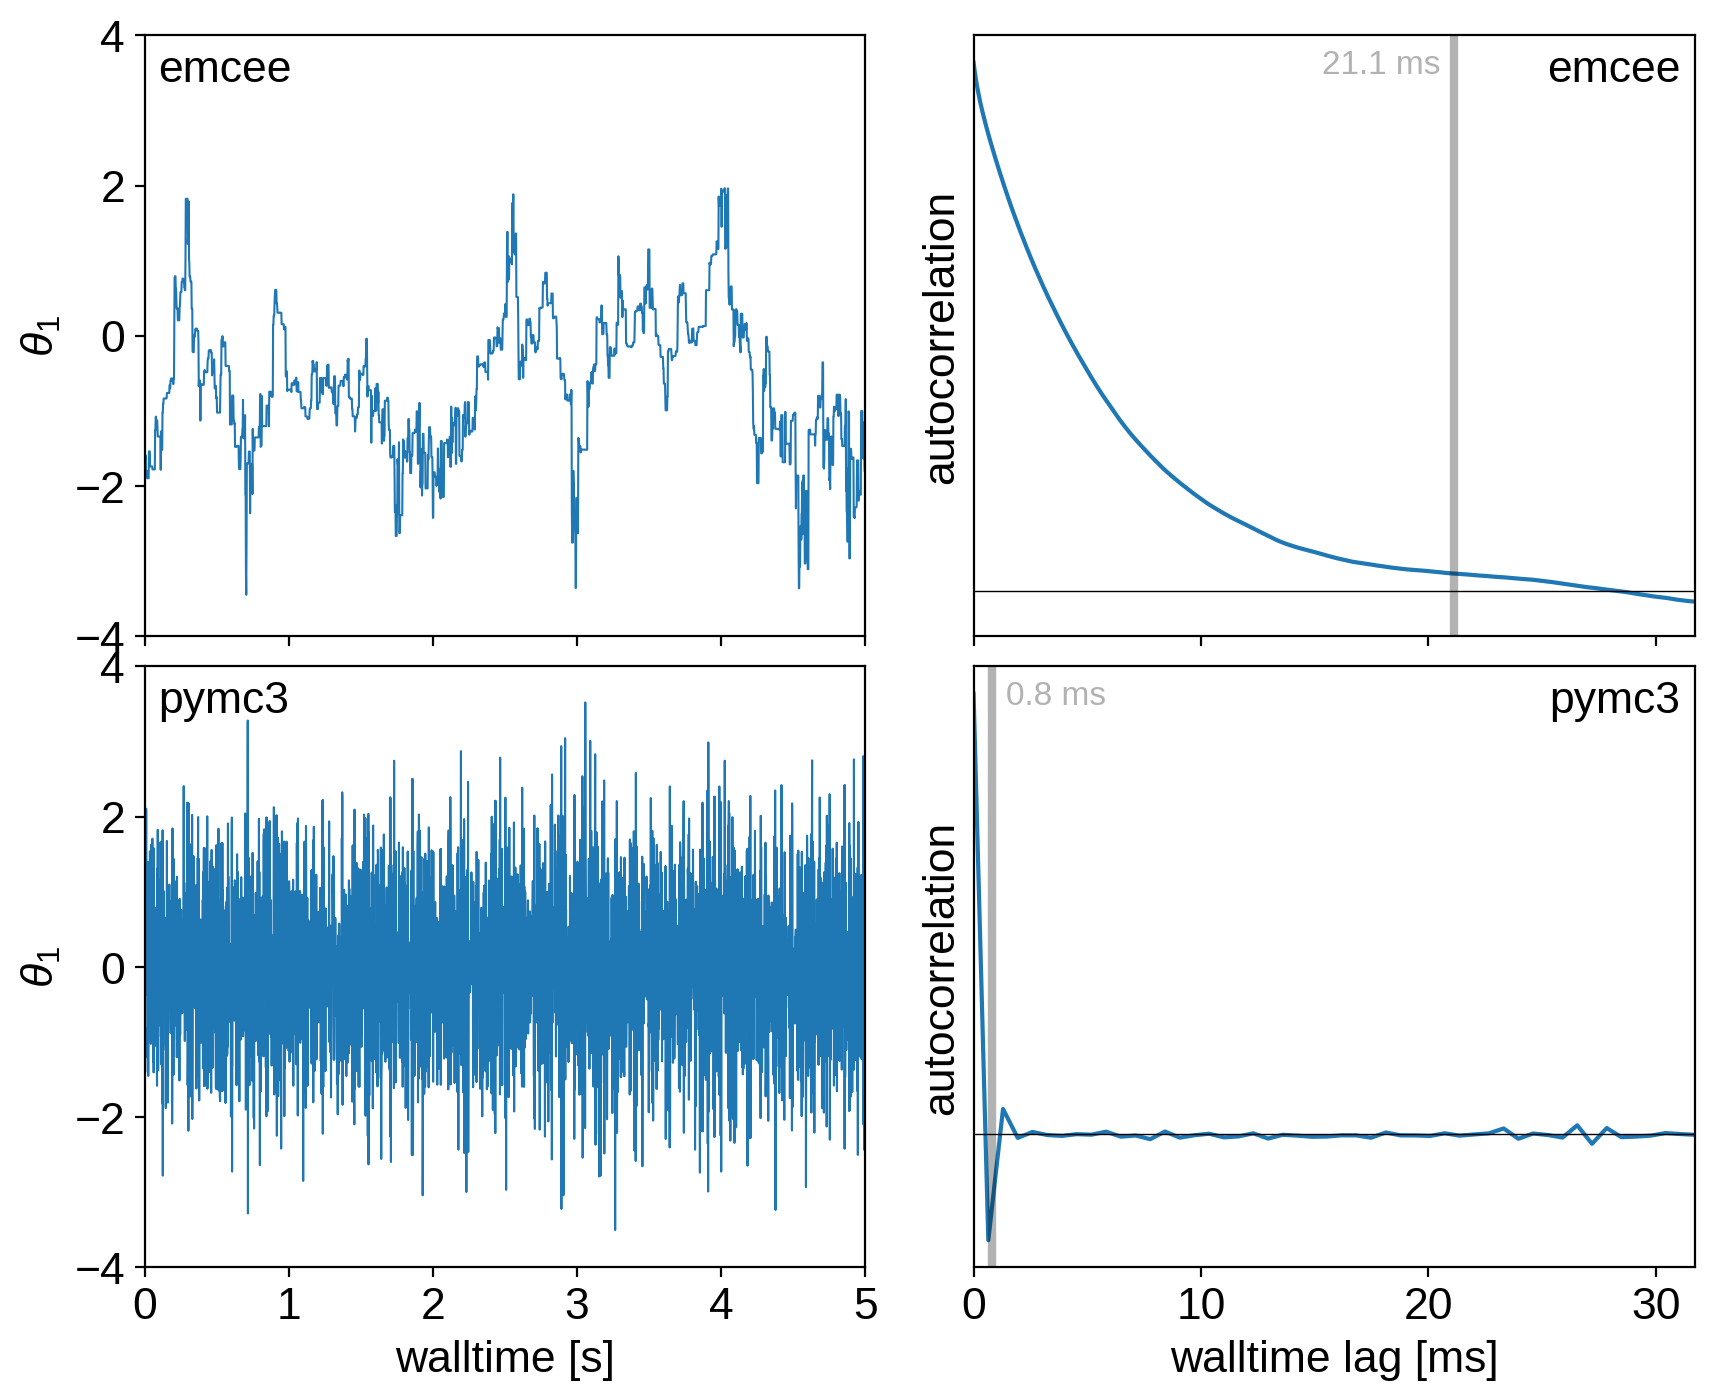

In [9]:
def get_function(x):
    n_t, n_w = x.shape
    f = np.zeros(n_t)
    for k in range(n_w):
        f += emcee.autocorr.function_1d(x[:, k])
    f /= n_w
    return f

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

ax = axes[0, 0]
t_emcee = np.linspace(0, time_emcee, samples_emcee.shape[0])
m = t_emcee < 5
ax.plot(t_emcee[m], samples_emcee[m, 5, 0], lw=0.75)
ax.annotate("emcee", xy=(0, 1), xycoords="axes fraction",
            ha="left", va="top", fontsize=16,
            xytext=(5, -5), textcoords="offset points")
ax.set_ylabel(r"$\theta_1$")
ax.set_xlim(0, 5)
ax.set_ylim(-4, 4)
ax.set_xticklabels([])

ax = axes[1, 0]
t_pymc3 = np.linspace(0, time_pymc3, samples_pymc3.shape[0])
m = t_pymc3 < 5
ax.plot(t_pymc3[m], samples_pymc3[m, 0, 0], lw=0.75)
ax.annotate("pymc3", xy=(0, 1), xycoords="axes fraction",
            ha="left", va="top", fontsize=16,
            xytext=(5, -5), textcoords="offset points")
ax.set_ylabel(r"$\theta_1$")
ax.set_xlabel("walltime [s]")
ax.set_xlim(0, 5)
ax.set_ylim(-4, 4)

ax = axes[0, 1]
f_emcee = get_function(samples_emcee[:, :, 0])
scale = 1e3*time_emcee / np.prod(samples_emcee.shape[:2])
ax.plot(scale * np.arange(len(f_emcee)), f_emcee)
ax.axhline(0, color="k", lw=0.5)
ax.annotate("emcee", xy=(1, 1), xycoords="axes fraction",
            ha="right", va="top", fontsize=16,
            xytext=(-5, -5), textcoords="offset points")
val = 2*scale*tau_emcee[0]
max_x = 1.5*val
ax.axvline(val, color="k", lw=3, alpha=0.3)
ax.annotate("{0:.1f} ms".format(val), xy=(val/max_x, 1), xycoords="axes fraction",
            ha="right", va="top", fontsize=12, alpha=0.3,
            xytext=(-5, -5), textcoords="offset points")
ax.set_xlim(0, max_x)
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_ylabel("autocorrelation")

ax = axes[1, 1]
f_pymc3 = get_function(samples_pymc3[:, :, 0])
scale = 1e3*time_pymc3 / np.prod(samples_pymc3.shape[:2])
ax.plot(scale * np.arange(len(f_pymc3)), f_pymc3)
ax.axhline(0, color="k", lw=0.5)
ax.annotate("pymc3", xy=(1, 1), xycoords="axes fraction",
            ha="right", va="top", fontsize=16,
            xytext=(-5, -5), textcoords="offset points")
val = 2*scale*tau_pymc3[0]
ax.axvline(val, color="k", lw=3, alpha=0.3)
ax.annotate("{0:.1f} ms".format(val), xy=(val/max_x, 1), xycoords="axes fraction",
            ha="left", va="top", fontsize=12, alpha=0.3,
            xytext=(5, -5), textcoords="offset points")
ax.set_xlim(0, max_x)
ax.set_yticks([])
ax.set_xlabel("walltime lag [ms]")
ax.set_ylabel("autocorrelation")

fig.subplots_adjust(hspace=0.05, wspace=0.15)
fig.savefig("gaussians.pdf", bbox_inches="tight");